## Artificial Intelligence Assignment 2
## No9. Image Recognition
## 20132651 Sungjae Lee

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

In [3]:
transformation = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
train_dataset = datasets.MNIST('data/', train = True, transform=transformation, download = True)
test_dataset = datasets.MNIST('data/', train = False, transform=transformation, download = True)

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [6]:
sample_data = next(iter(train_loader))

In [7]:
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image, cmap = 'gray')

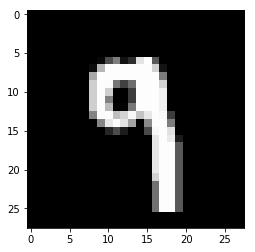

In [8]:
plot_img(sample_data[0][2])

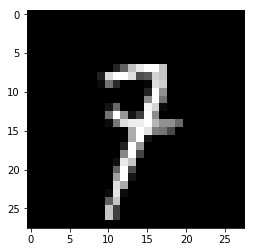

In [9]:
plot_img(sample_data[0][1])

In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        #x = F.dropout(x, p = 0.1, training = self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1)

In [11]:
model = Net()
if is_cuda:
    model.cuda()

In [12]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [13]:
data, target = next(iter(train_loader))

In [14]:
output = model(Variable(data))

In [15]:
print(output.size())

torch.Size([32, 10])


In [16]:
print(target.size())

torch.Size([32])


In [17]:
def fit(epoch, model, data_loader, phase = 'training', volatile = False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    running_loss = 0.0
    running_correct = 0
    for batch_idx, (data, target) in enumerate(data_loader):
        if is_cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile), Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        
        running_loss += F.nll_loss(output, target, size_average = False).data[0]
        preds = output.data.max(dim = 1, keepdim = True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
            
    loss = running_loss / len(data_loader.dataset)
    accuracy = 100. * running_correct / len(data_loader.dataset)
    my_string = f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct} / {len(data_loader.dataset)}{accuracy}'
    print(my_string)
    return loss, accuracy

In [18]:
train_losses, train_accuracy = [], []
val_losses, val_accuracy = [], []
for epoch in range(1, 20):
    epoch_loss, epoch_accuracy = fit(epoch, model, train_loader, phase = 'training')
    val_ephoch_loss, val_epoch_accuracy = fit(epoch, model, test_loader, phase = 'validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_ephoch_loss)
    val_accuracy.append(val_epoch_accuracy)

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


training loss is  0.56 and training accuracy is 49610 / 6000082
validation loss is  0.15 and validation accuracy is 9580 / 1000095
training loss is  0.19 and training accuracy is 56702 / 6000094
validation loss is   0.1 and validation accuracy is 9693 / 1000096
training loss is  0.15 and training accuracy is 57415 / 6000095
validation loss is 0.073 and validation accuracy is 9776 / 1000097
training loss is  0.13 and training accuracy is 57774 / 6000096
validation loss is 0.067 and validation accuracy is 9790 / 1000097
training loss is  0.11 and training accuracy is 58054 / 6000096
validation loss is 0.054 and validation accuracy is 9827 / 1000098
training loss is   0.1 and training accuracy is 58177 / 6000096
validation loss is 0.052 and validation accuracy is 9827 / 1000098
training loss is 0.093 and training accuracy is 58361 / 6000097
validation loss is 0.049 and validation accuracy is 9848 / 1000098
training loss is 0.087 and training accuracy is 58449 / 6000097
validation loss is 

In [19]:
print(train_losses, train_accuracy)
print(val_losses, val_accuracy)

[tensor(0.5606), tensor(0.1918), tensor(0.1501), tensor(0.1279), tensor(0.1097), tensor(0.1029), tensor(0.0932), tensor(0.0867), tensor(0.0818), tensor(0.0786), tensor(0.0743), tensor(0.0696), tensor(0.0675), tensor(0.0660), tensor(0.0638), tensor(0.0600), tensor(0.0585), tensor(0.0563), tensor(0.0544)] [tensor(82), tensor(94), tensor(95), tensor(96), tensor(96), tensor(96), tensor(97), tensor(97), tensor(97), tensor(97), tensor(97), tensor(97), tensor(97), tensor(98), tensor(98), tensor(98), tensor(98), tensor(98), tensor(98)]
[tensor(0.1469), tensor(0.1011), tensor(0.0725), tensor(0.0671), tensor(0.0540), tensor(0.0516), tensor(0.0495), tensor(0.0414), tensor(0.0407), tensor(0.0402), tensor(0.0368), tensor(0.0366), tensor(0.0381), tensor(0.0350), tensor(0.0335), tensor(0.0312), tensor(0.0339), tensor(0.0297), tensor(0.0312)] [tensor(95), tensor(96), tensor(97), tensor(97), tensor(98), tensor(98), tensor(98), tensor(98), tensor(98), tensor(98), tensor(98), tensor(98), tensor(98), tens

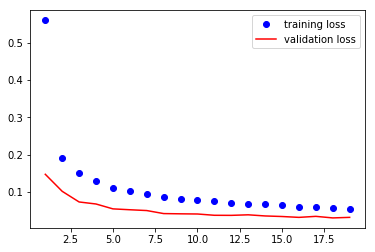

In [20]:
plt.plot(range(1, len(train_losses) + 1), train_losses, 'bo', label = 'training loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, 'r', label = 'validation loss')
plt.legend()

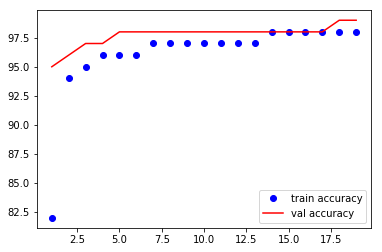

In [21]:
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'bo', label = 'train accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'r', label = 'val accuracy')
plt.legend()